In [97]:
#Import the libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [98]:
import yfinance as yf
import pandas as pd

# Specify the start and end dates
start_date = '2023-01-01'
end_date = '2024-01-29'

# Define the stock ticker (AAPL in this case)
ticker = 'KALYANKJIL.NS'

# Use yfinance to get historical stock data
df = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the DataFrame
print(df.head())


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-02  126.599998  127.699997  124.000000  125.099998  124.733032   
2023-01-03  125.599998  127.000000  123.500000  124.699997  124.334206   
2023-01-04  125.300003  126.000000  118.250000  120.800003  120.445648   
2023-01-05  121.449997  124.199997  119.500000  123.099998  122.738899   
2023-01-06  123.099998  123.500000  118.599998  120.400002  120.046822   

             Volume  
Date                 
2023-01-02  3324015  
2023-01-03  2287722  
2023-01-04  4098252  
2023-01-05  3911591  
2023-01-06  3182421  


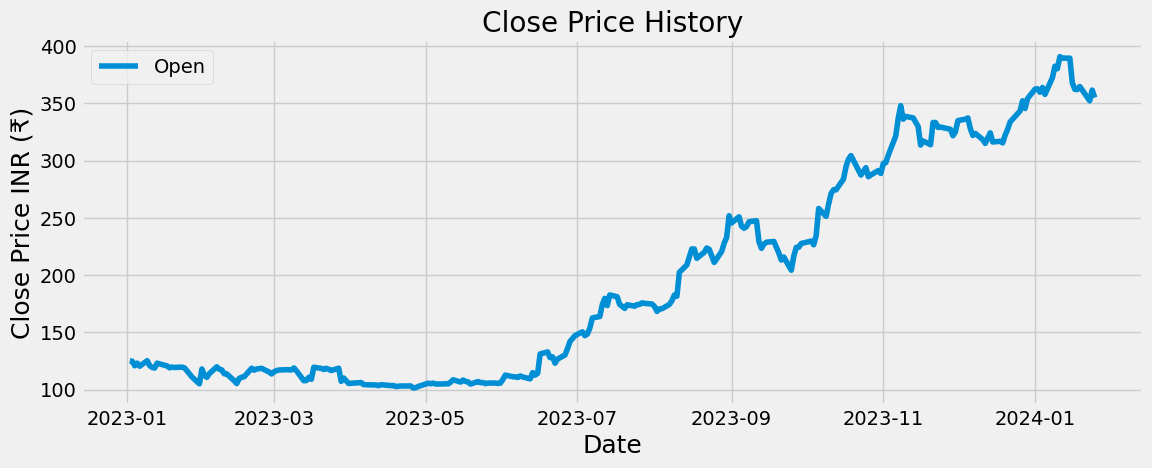

In [99]:
#Visually Show The Stock Price
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( df['Close'],  label='Close Price')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)  
plt.title('Close Price History')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR (₹)',fontsize=18)
plt.legend(df.columns.values, loc='upper left')
plt.show()

In [100]:
#Calculate the typical price
typical_price = (df['Close'] + df['High'] + df['Low']) / 3
typical_price

Date
2023-01-02    125.599998
2023-01-03    125.066666
2023-01-04    121.683334
2023-01-05    122.266665
2023-01-06    120.833333
                 ...    
2024-01-18    360.700012
2024-01-19    365.799998
2024-01-23    352.833333
2024-01-24    359.250000
2024-01-25    358.383341
Length: 263, dtype: float64

In [101]:
period =  14 #The typical period used for MFI is 14 days


Calculate and show the Money Flow.



In [102]:
#Calculate the money flow
money_flow = typical_price * df['Volume']
money_flow

Date
2023-01-02    4.174963e+08
2023-01-03    2.861178e+08
2023-01-04    4.986890e+08
2023-01-05    4.782572e+08
2023-01-06    3.845425e+08
                  ...     
2024-01-18    5.593931e+08
2024-01-19    5.089950e+08
2024-01-23    8.997998e+08
2024-01-24    7.632302e+08
2024-01-25    3.334660e+08
Length: 263, dtype: float64

Get all of the positive and negative money flows.



In [103]:
#Get all of the positive and negative money flows 
#where the current typical price is higher than the previous day's typical price, we will append that days money flow to a positive list
#and where the current typical price is lower than the previous day's typical price, we will append that days money flow to a negative list
#and set any other value to 0 to be used when summing
positive_flow =[] #Create a empty list called positive flow
negative_flow = [] #Create a empty list called negative flow
#Loop through the typical price 
for i in range(1, len(typical_price)):
  if typical_price[i] > typical_price[i-1]: #if the present typical price is greater than yesterdays typical price
    positive_flow.append(money_flow[i-1])# Then append money flow at position i-1 to the positive flow list
    negative_flow.append(0) #Append 0 to the negative flow list
  elif typical_price[i] < typical_price[i-1]:#if the present typical price is less than yesterdays typical price
    negative_flow.append(money_flow[i-1])# Then append money flow at position i-1 to negative flow list
    positive_flow.append(0)#Append 0 to the positive flow list
  else: #Append 0 if the present typical price is equal to yesterdays typical price
    positive_flow.append(0)
    negative_flow.append(0)

Get all of the positive and negative money flows within the time period.



In [104]:
#Get all of the positive and negative money flows within the time period
positive_mf =[]
negative_mf = [] 
#Get all of the positive money flows within the time period
for i in range(period-1, len(positive_flow)):
  positive_mf.append(sum(positive_flow[i+1-period : i+1]))
#Get all of the negative money flows within the time period  
for i in range(period-1, len(negative_flow)):
  negative_mf.append(sum(negative_flow[i+1-period : i+1]))

Calculate and show the Money Flow Index (MFI).



In [105]:
mfi = 100 * (np.array(positive_mf) / (np.array(positive_mf)  + np.array(negative_mf) ))


Graph and visually show the MFI.



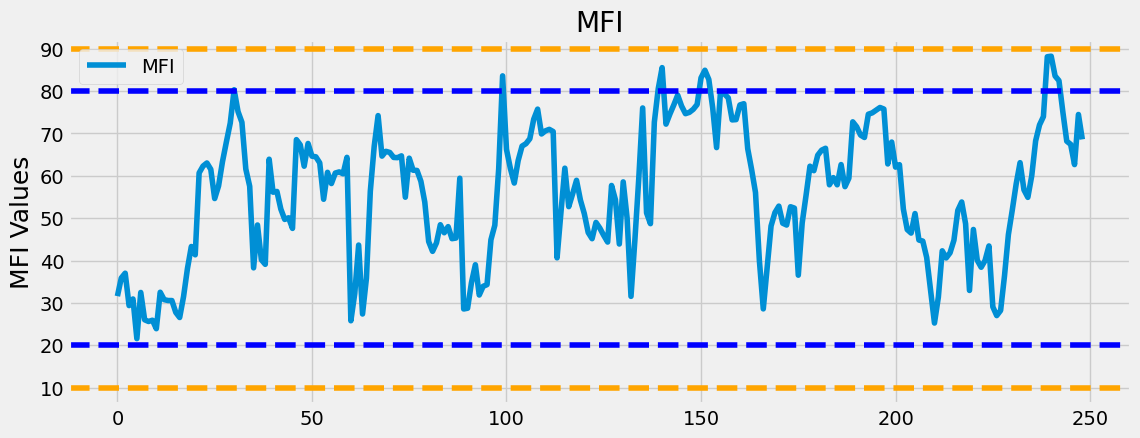

In [106]:
# Visually Show The Money Flow Index
df2 = pd.DataFrame()
df2['MFI'] = mfi
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( df2['MFI'],  label='MFI')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.axhline(10, linestyle='--', color = 'orange')  #Over Sold line (Buy)
plt.axhline(20, linestyle='--',color = 'blue')  #Over Sold Line (Buy)
plt.axhline(80, linestyle='--', color = 'blue')  #Over Bought line (Sell)
plt.axhline(90, linestyle='--', color = 'orange')  #Over Bought line (Sell)
plt.title('MFI')
plt.ylabel('MFI Values',fontsize=18)
plt.legend(df2.columns.values, loc='upper left')
plt.show()

Create and show a new data frame from the start of the time period to the rest of the data in the original data set. Add a new column to store the MFI. This will be used to show the buy and sell signals.

In [107]:
#Create a new data frame
new_df = pd.DataFrame()
new_df = df[period:]
new_df['MFI'] = mfi
#Show the new data frame
data = new_df


In [108]:
data

,Open,High,Low,Close,Adj Close,Volume,MFI
Date,,,,,,,
2023-01-20,119.500000,120.750000,118.449997,119.300003,118.950050,1110487,31.584590
2023-01-23,119.900002,120.900002,118.500000,119.599998,119.249168,1066390,35.877569
2023-01-24,119.599998,120.449997,118.199997,118.900002,118.551224,922365,37.008609
2023-01-25,118.900002,119.349998,114.199997,116.349998,116.008698,2094736,29.360422
2023-01-27,117.150002,117.150002,105.599998,111.000000,110.674393,4617836,30.919605
...,...,...,...,...,...,...,...
2024-01-18,363.000000,367.950012,352.200012,361.950012,361.950012,1550854,68.173802
2024-01-19,365.149994,370.250000,362.549988,364.600006,364.600006,1391457,67.430550
2024-01-23,363.350006,363.350006,343.000000,352.149994,352.149994,2550212,62.650122


Create a function to get the buy and sell signals.



In [109]:
# Create a function to get the buy and sell signals
#MFI above 80 is considered overbought condition and MFI below 20 is considered oversold.
#MFI > 80 then Sell
#MFI < 20 then Buy
def get_signal(data, High, Low):
  buy_signal = [] #The stock was over sold
  sell_signal = [] #The stock was over bought

In [110]:
data

,Open,High,Low,Close,Adj Close,Volume,MFI
Date,,,,,,,
2023-01-20,119.500000,120.750000,118.449997,119.300003,118.950050,1110487,31.584590
2023-01-23,119.900002,120.900002,118.500000,119.599998,119.249168,1066390,35.877569
2023-01-24,119.599998,120.449997,118.199997,118.900002,118.551224,922365,37.008609
2023-01-25,118.900002,119.349998,114.199997,116.349998,116.008698,2094736,29.360422
2023-01-27,117.150002,117.150002,105.599998,111.000000,110.674393,4617836,30.919605
...,...,...,...,...,...,...,...
2024-01-18,363.000000,367.950012,352.200012,361.950012,361.950012,1550854,68.173802
2024-01-19,365.149994,370.250000,362.549988,364.600006,364.600006,1391457,67.430550
2024-01-23,363.350006,363.350006,343.000000,352.149994,352.149994,2550212,62.650122


In [111]:
import numpy as np

def get_signal(data, High, Low):
    buy_signal = []  # The stock was oversold
    sell_signal = []  # The stock was overbought
    
    for i in range(len(data['MFI'])):
        if data['MFI'][i] > High:  # Then the stock is overbought, you should sell 
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
        elif data['MFI'][i] < Low:  # Then the stock is oversold, you should buy
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
    
    return buy_signal, sell_signal


In [112]:
#Add new columns (Buy & Sell)
new_df['Buy'] = get_signal(new_df, 80, 20)[0]
new_df['Sell'] = get_signal(new_df, 80, 20)[1]
#Show the new dataframe
new_df

,Open,High,Low,Close,Adj Close,Volume,MFI,Buy,Sell
Date,,,,,,,,,
2023-01-20,119.500000,120.750000,118.449997,119.300003,118.950050,1110487,31.584590,NaN,NaN
2023-01-23,119.900002,120.900002,118.500000,119.599998,119.249168,1066390,35.877569,NaN,NaN
2023-01-24,119.599998,120.449997,118.199997,118.900002,118.551224,922365,37.008609,NaN,NaN
2023-01-25,118.900002,119.349998,114.199997,116.349998,116.008698,2094736,29.360422,NaN,NaN
2023-01-27,117.150002,117.150002,105.599998,111.000000,110.674393,4617836,30.919605,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-01-18,363.000000,367.950012,352.200012,361.950012,361.950012,1550854,68.173802,NaN,NaN
2024-01-19,365.149994,370.250000,362.549988,364.600006,364.600006,1391457,67.430550,NaN,NaN
2024-01-23,363.350006,363.350006,343.000000,352.149994,352.149994,2550212,62.650122,NaN,NaN


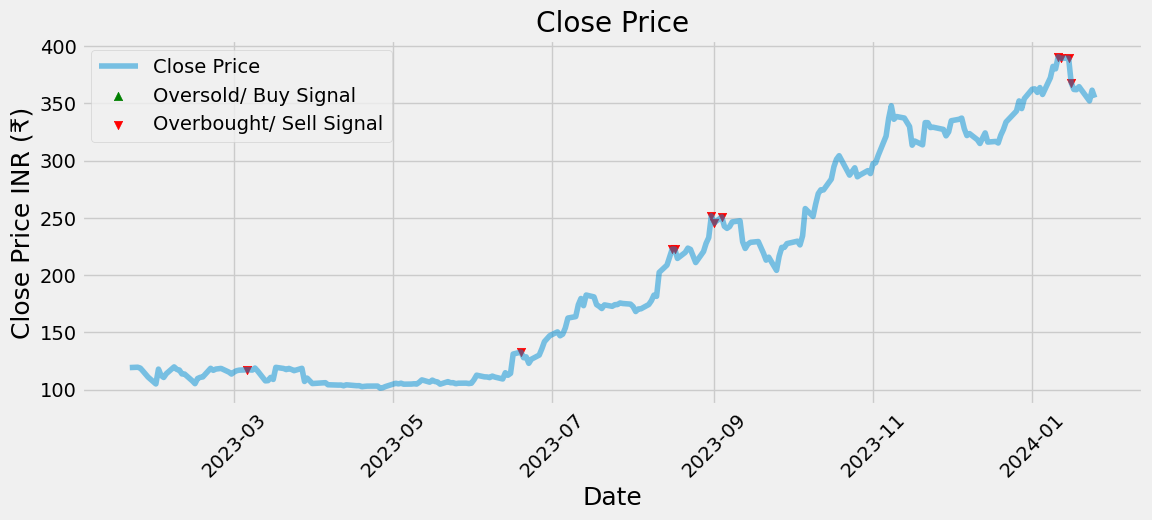

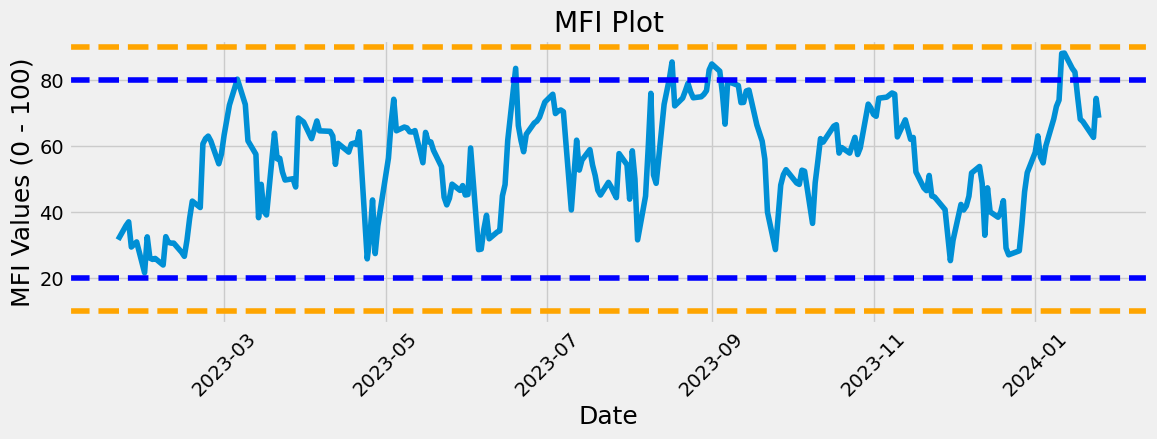

In [114]:
# plot the close price history
plt.figure(figsize=(12.2,4.5))
plt.plot(new_df.index, new_df['Close'],alpha = 0.5, label='Close Price')
plt.scatter(new_df.index, new_df['Buy'], color = 'green', label='Oversold/ Buy Signal', marker = '^', alpha = 1)
plt.scatter(new_df.index, new_df['Sell'], color = 'red', label='Overbought/ Sell Signal', marker = 'v', alpha = 1)
plt.title('Close Price')
plt.xlabel('Date',fontsize=18)
plt.xticks(rotation = 45)
plt.ylabel('Close Price INR (₹)',fontsize=18)
plt.legend( loc='upper left')
plt.show()
# plot the corresponding MFI values and significant levels
plt.figure(figsize=(12.4,3.5))
plt.title('MFI Plot')
plt.plot(new_df.index, new_df['MFI'])
plt.axhline(10, linestyle='--',color = 'orange') #Buy
plt.axhline(20, linestyle='--', color = 'blue') #Sell
plt.axhline(80, linestyle='--', color = 'blue') #Sell
plt.axhline(90, linestyle='--', color = 'orange') #Sell
plt.xlabel('Date',fontsize=18)
plt.xticks(rotation = 45)
plt.ylabel('MFI Values (0 - 100)',fontsize=18)
plt.show()